# FYS-STK4155 Homework 1

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [102]:
# Exercise 1 - Reading x and y values and designing a nxp design matrix with p = 4

# Reading file with pandas
# Two column csv file with x_i and y_i
csv_file = 'HW1csv.csv'
df = pd.read_csv(csv_file, header=None)

# Vectors and constants for the regression
x = df.values[:,0]
y = df.values[:,1]
n = x.size
p = 4

# Design matrix
X = np.empty((n, p))
for i in range(p):
    X[:, i] = x**i # Row 1 becomes [1, x_0, x_0^2, x_0^3]
    
# print(X) # Looks good!

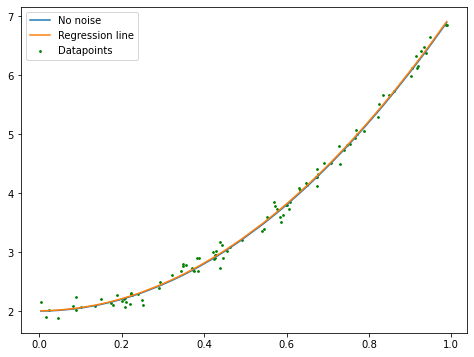

In [103]:
# Exercise 2: making your own data and exploring scikit-learn

# Input vectors x and y
x = np.random.rand(100) #an array of 100 unordered uniform random numbers from 0 to 1
x.sort()
y = 2 + 5 * x**2 + 0.1 * np.random.randn(100) # quadratic of x plus normally distributed noise

n = x.size
p = 3

# Design matrix
X = np.empty((n, p))
for i in range(p):
    X[:, i] = x**i # Row 1 becomes [1, x_0, x_0^2]

# Finding the coefficients beta
beta = np.linalg.inv(X.T @ X) @ X.T @ y # beta = (X.T X)^-1 X.T y
y_mdl = X @ beta

# Plotting of results
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = "green", s = 3, label="Datapoints")
plt.plot(x, 2 + 5 * x**2, label="No noise")
plt.plot(x, y_mdl, label = "Regression line")
plt.legend()
plt.show()

In [101]:
clf = skl.LinearRegression(fit_intercept = False).fit(X, y)
y_skl_mdl = clf.predict(X)

mse = mean_squared_error(y, y_skl_mdl)

r2 = r2_score(y, y_skl_mdl)

mae = mean_absolute_error(y, y_skl_mdl)

print(f"mse = {mse} \nrs = {r2} \nmae = {mae}")

mse = 0.009008431874745293 
rs = 0.9955370310972893 
mae = 0.07492521857661116
